# K-Nearest Neighbors classification - Iris dataset

In [ ]:
# import csv
# with open(r'itis.data.txt') as csvfile:
#    lines = csv.reader(csvfile)
#    for row in lines:
#        print(', '.join(row))

In [144]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6.0,6.0)

import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
iris=load_iris()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=0)

#iris.feature_names
print ('Iris Feature Names:'+str(iris.feature_names))
#iris.target_names
print ('Iris Target Names:'+str(iris.target_names))
#iris.target
#iris.data
print(type(iris))

# iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])

iris_data = pd.DataFrame(data= np.c_[X_train, y_train],
                     columns= iris['feature_names'] + ['target'])

iris_test = pd.DataFrame(data= np.c_[X_test, y_test],
                     columns= iris['feature_names'] + ['target'])
                         
print(type(iris_data))
iris_data

Iris Feature Names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris Target Names:['setosa' 'versicolor' 'virginica']
<class 'sklearn.utils.Bunch'>
<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.6,2.5,3.9,1.1,1.0
1,7.7,3.0,6.1,2.3,2.0
2,6.3,3.3,4.7,1.6,1.0
3,5.5,2.4,3.8,1.1,1.0
4,6.3,2.7,4.9,1.8,2.0
...,...,...,...,...,...
95,4.9,3.1,1.5,0.1,0.0
96,6.3,2.9,5.6,1.8,2.0
97,5.8,2.7,4.1,1.0,1.0
98,7.7,3.8,6.7,2.2,2.0


In [3]:
import seaborn as sns

<IPython.core.display.Javascript object>


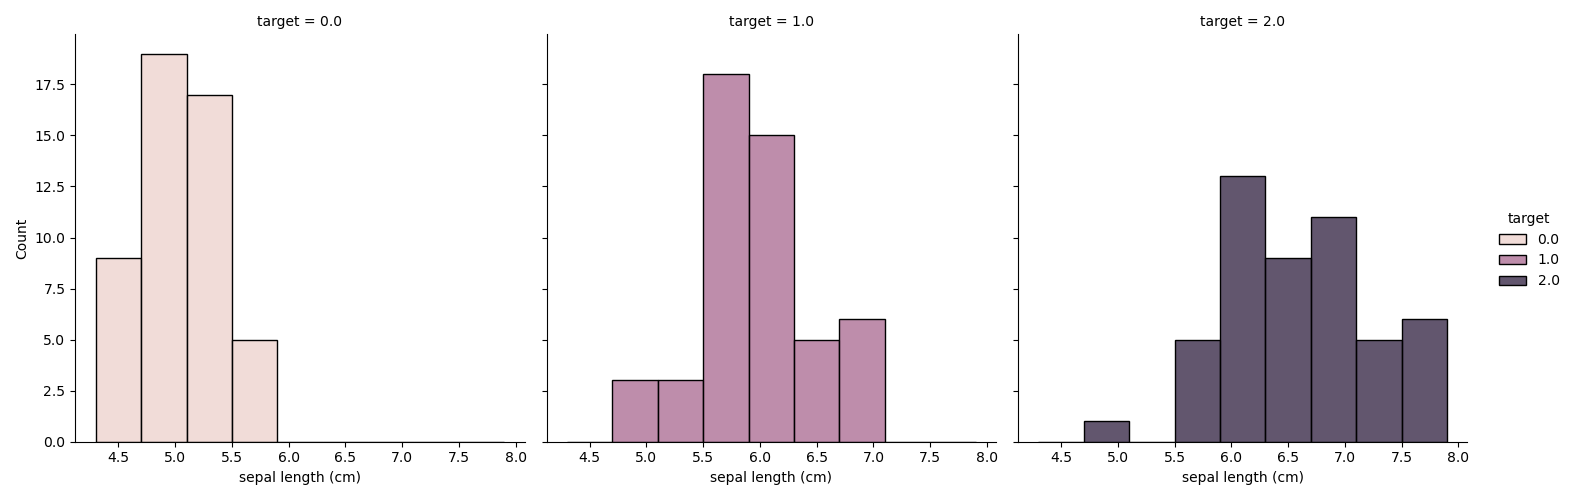

In [20]:
sns.displot(data=iris_data, x='sepal length (cm)', hue='target', col="target")

<IPython.core.display.Javascript object>


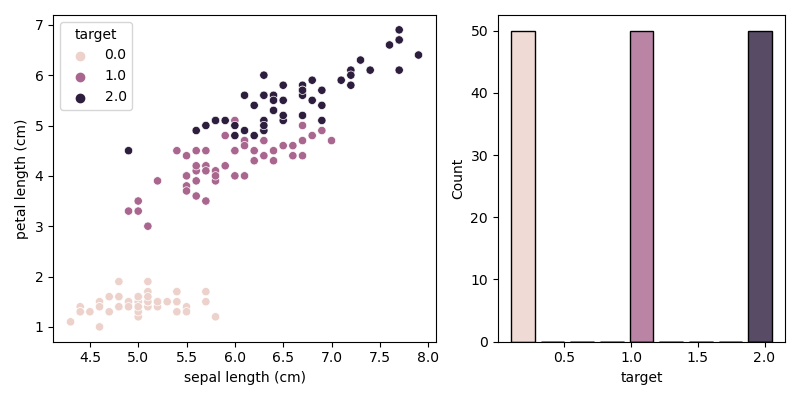

In [23]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=iris_data, x="sepal length (cm)", y="petal length (cm)", hue="target", ax=axs[0])
sns.histplot(data=iris_data, x="target", hue="target", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

<IPython.core.display.Javascript object>


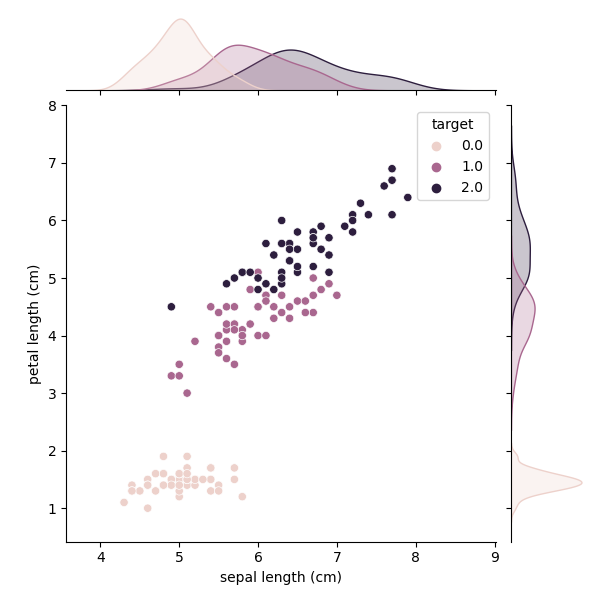

In [25]:
sns.jointplot(data=iris_data, x="sepal length (cm)", y="petal length (cm)", hue="target")

<IPython.core.display.Javascript object>


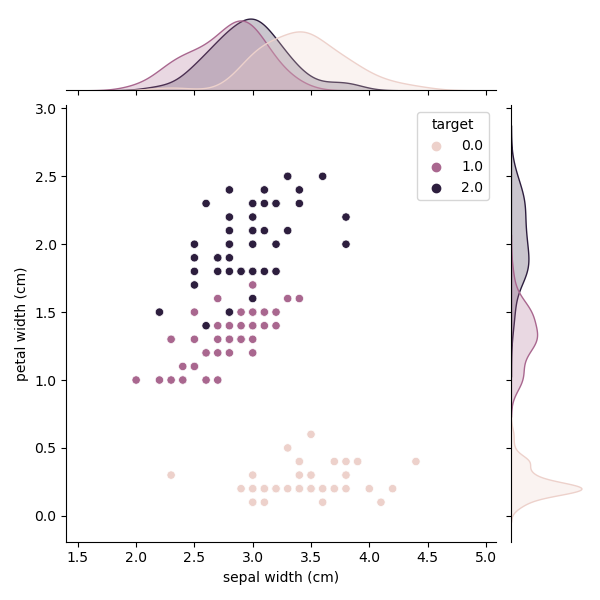

In [26]:
sns.jointplot(data=iris_data, x="sepal width (cm)", y="petal width (cm)", hue="target")

<IPython.core.display.Javascript object>


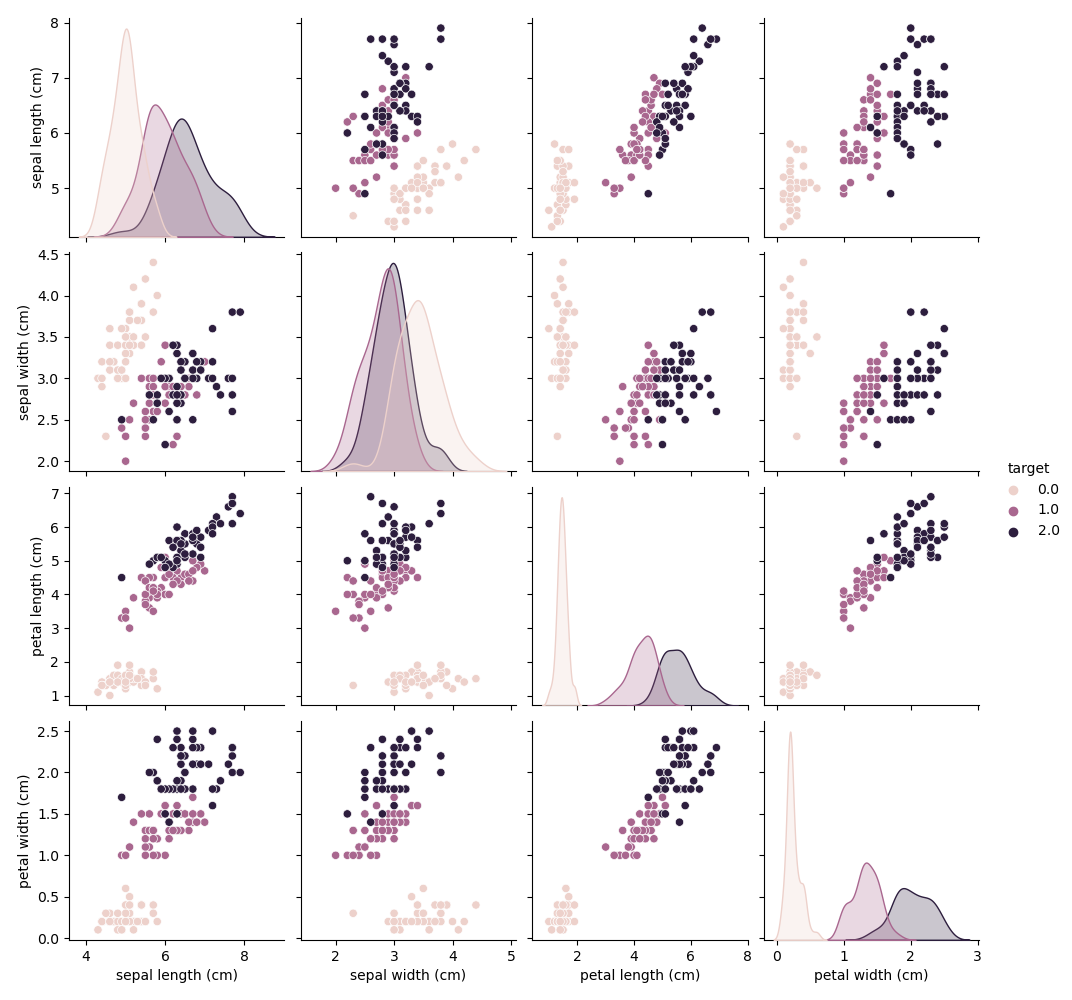

In [31]:
sns.pairplot(data=iris_data, hue="target")

<IPython.core.display.Javascript object>


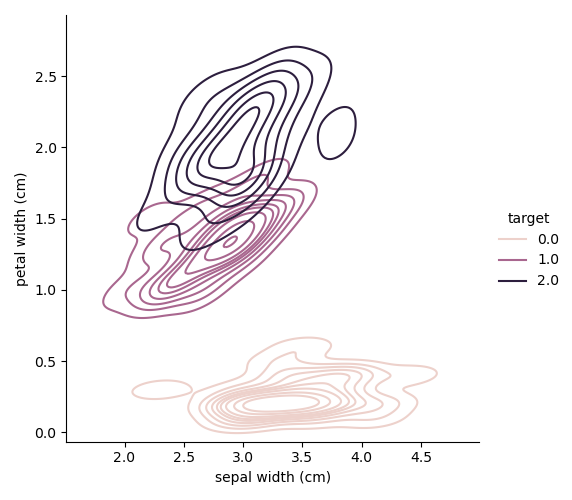

In [33]:
sns.displot(iris_data, x="sepal width (cm)", y="petal width (cm)",hue ='target', kind="kde")

In [56]:
def distance(sample1, sample2):
    ''' Euclidian distance of two sample
    takes 2 numpy array as argument
    
    >>> distance ([0,0],[3,4])
    '''
    return np.sqrt(np.sum(np.power(np.subtract(sample1,sample2),2)))

distance ([0,0],[3,4])

5.0

In [57]:
import math

def knn1(knowledge_base, sample_to_categorize):
    """k-nearest neighbour algorithm
    
    /!\ need to check that the second argument can take a nparray of sample 
    in the distance calculation
    """
    all_distances=[distance(sample,sample_to_categorize) for sample in knowledge_base[:,:-1]]
    nearest_distance=math.inf
    nearest_index=0
    for current_distance_index in range(len(all_distances)):
        if all_distances[current_distance_index]<nearest_distance:
            nearest_distance=all_distances[current_distance_index]
            nearest_index=current_distance_index
    return knowledge_base[nearest_index,-1]

In [75]:
# Unit test 1
knn1(np.array([[10,29,4,123,3,54,999]]),np.array([[1,1,1,1,1,1]]))

999

In [76]:
# Unit test 2
knn1(np.array([[10,29,4,123,3,54,999],[2,2,2,2,2,2,0],[0,0,0,1,0,0,1]]),np.array([[1,1,1,1,1,1]]))

1

In [95]:
# try on the first sample 
print("First Sample")
print (iris.feature_names)
print(iris_test.to_numpy()[0])
inference=knn1(iris_data.to_numpy(),iris_test.to_numpy()[0,:-1])
print("Inference: ",str(inference))
print("Meaning: ",iris.target_names[int(inference)])

First Sample
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[5.8 2.8 5.1 2.4 2. ]
Inference:  2.0
Meaning:  virginica


In [145]:
def knn(knowledge_base, set_to_categorize,k):
    """k-nearest neighbour algorithm
    
    knn(iris_data.to_numpy(),iris_test.to_numpy()[0,:-1],3)
    """
    all_distances=[
        distance(sample,
                 [sample_to_categorize 
                  for sample_to_categorize in set_to_categorize]
                ) 
        for sample in knowledge_base[:,:-1]
    ]
    # print("All Distances")
    # print(all_distances)
    all_sorted_distances_index = np.argsort(all_distances)
    # print("All sorted Distances index")
    # print(all_sorted_distances_index)
    infered_result=np.array([])
    for index in range(k):
        infered_result=np.append(infered_result,knowledge_base[all_sorted_distances_index[index],-1])
    counts = np.bincount(infered_result.astype(int))
    return np.argmax(counts)

In [146]:
k = 3
# try on all the test samples
print("All test samples")
print (iris.feature_names)
iris_test_np=iris_test.to_numpy()
print(iris_test_np)

print("########")

print("Inference on the first test sample")
inference=knn(iris_data.to_numpy(),iris_test.to_numpy()[0,:-1],k)
print("Inference: ",str(inference))
print("Meaning: ",str(iris.target_names[inference]))
print(" from ",str(iris.target_names))

print("########")

print("Inference on all the test samples")
inference=[knn(iris_data.to_numpy(),samples[:-1],k) for samples in iris_test_np]
print("Inference: ",str(inference))
print("Meaning: ",str(iris.target_names[inference]))
print(" from ",str(iris.target_names))




All test samples
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.8 2.8 5.1 2.4 2. ]
 [6.  2.2 4.  1.  1. ]
 [5.5 4.2 1.4 0.2 0. ]
 [7.3 2.9 6.3 1.8 2. ]
 [5.  3.4 1.5 0.2 0. ]
 [6.3 3.3 6.  2.5 2. ]
 [5.  3.5 1.3 0.3 0. ]
 [6.7 3.1 4.7 1.5 1. ]
 [6.8 2.8 4.8 1.4 1. ]
 [6.1 2.8 4.  1.3 1. ]
 [6.1 2.6 5.6 1.4 2. ]
 [6.4 3.2 4.5 1.5 1. ]
 [6.1 2.8 4.7 1.2 1. ]
 [6.5 2.8 4.6 1.5 1. ]
 [6.1 2.9 4.7 1.4 1. ]
 [4.9 3.6 1.4 0.1 0. ]
 [6.  2.9 4.5 1.5 1. ]
 [5.5 2.6 4.4 1.2 1. ]
 [4.8 3.  1.4 0.3 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.6 2.8 4.9 2.  2. ]
 [5.6 3.  4.5 1.5 1. ]
 [4.8 3.4 1.9 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [6.2 2.8 4.8 1.8 2. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.8 1.9 0.4 0. ]
 [6.2 2.9 4.3 1.3 1. ]
 [5.  2.3 3.3 1.  1. ]
 [5.  3.4 1.6 0.4 0. ]
 [6.4 3.1 5.5 1.8 2. ]
 [5.4 3.  4.5 1.5 1. ]
 [5.2 3.5 1.5 0.2 0. ]
 [6.1 3.  4.9 1.8 2. ]
 [6.4 2.8 5.6 2.2 2. ]
 [5.2 2.7 3.9 1.4 1. ]
 [5.7 3.8 1.7 0.3 0. ]
 [6.  2.7 5.1 1.6 1. ]
 [5.9 3.  4.2 1.5 1. ]
 [5

In [141]:
def getAccuracy(test_label,inference):
    samples_number = float(len(test_label))
    return str(100.0*(np.count_nonzero(test_label==inference))/samples_number)+"%"

In [147]:
getAccuracy(iris_test_np[:,-1],np.array(inference))

'96.0%'

In [134]:
iris_test_np[:,-1]

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1.])

In [135]:
inference

[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1]

In [143]:
# test suite for getAccuracy
getAccuracy(np.array([0,0,0]),np.array([1,0,0]))

'66.66666666666667%'